In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [2]:
df = pd.read_csv("D:\Machine Learning Projects\Customer Churn Prediction\dataset\Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.drop("customerID", axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

In [6]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [8]:
def show_unique_values(df):
    for col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False))
show_unique_values(df)


--- gender ---
gender
Male      3549
Female    3483
Name: count, dtype: int64

--- SeniorCitizen ---
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

--- Partner ---
Partner
No     3639
Yes    3393
Name: count, dtype: int64

--- Dependents ---
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

--- tenure ---
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

--- PhoneService ---
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

--- InternetService ---
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

--- OnlineB

In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.isna().mean() * 100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns


--- gender ---
Churn           0          1
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


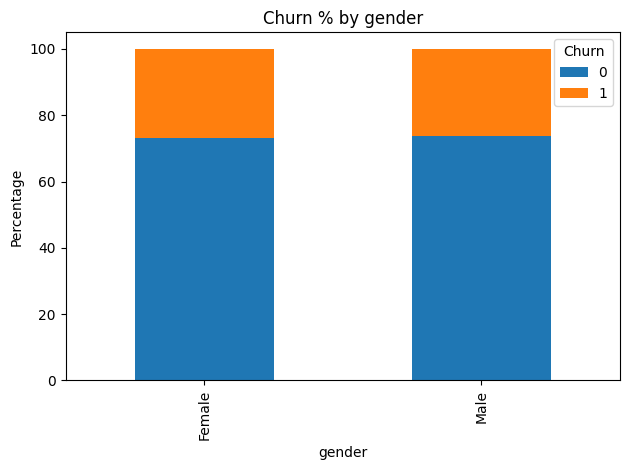


--- Partner ---
Churn            0          1
Partner                      
No       67.023908  32.976092
Yes      80.282935  19.717065


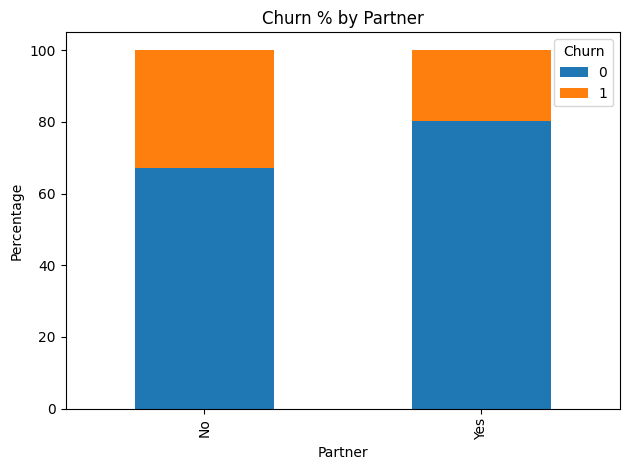


--- Dependents ---
Churn               0          1
Dependents                      
No          68.720860  31.279140
Yes         84.468795  15.531205


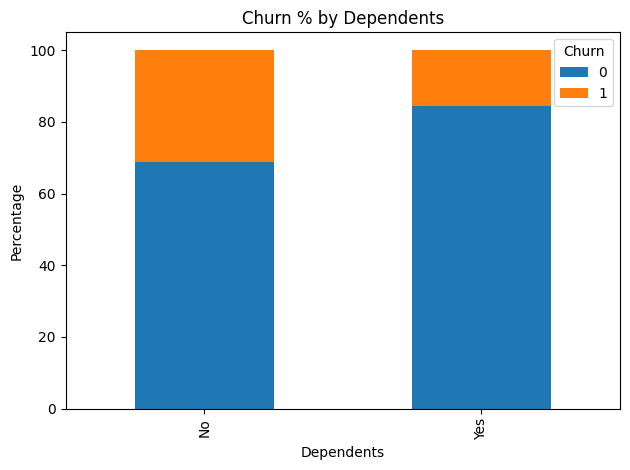


--- PhoneService ---
Churn                 0          1
PhoneService                      
No            75.000000  25.000000
Yes           73.252519  26.747481


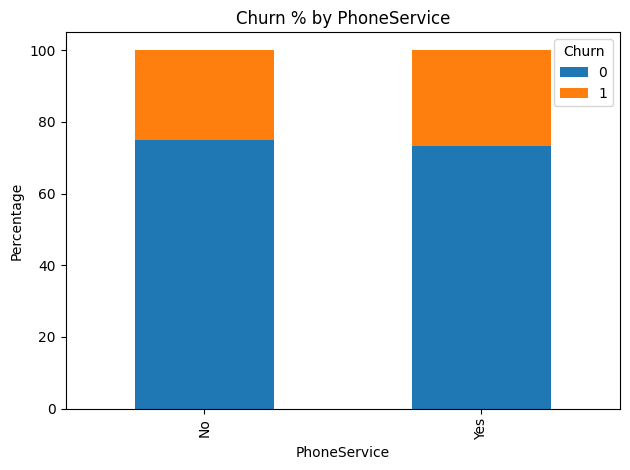


--- MultipleLines ---
Churn                     0          1
MultipleLines                         
No                74.918759  25.081241
No phone service  75.000000  25.000000
Yes               71.351534  28.648466


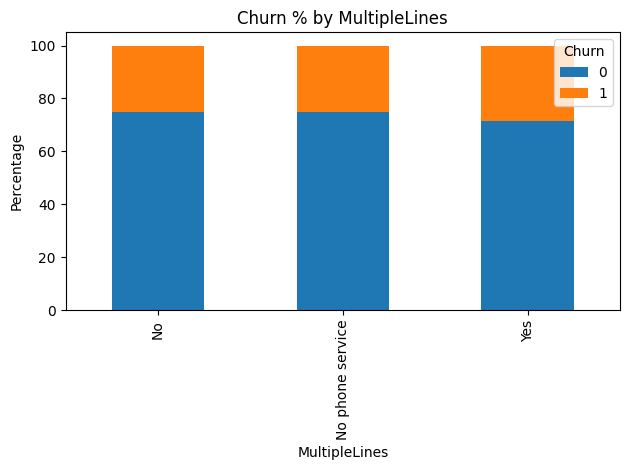


--- InternetService ---
Churn                    0          1
InternetService                      
DSL              81.001656  18.998344
Fiber optic      58.107235  41.892765
No               92.565789   7.434211


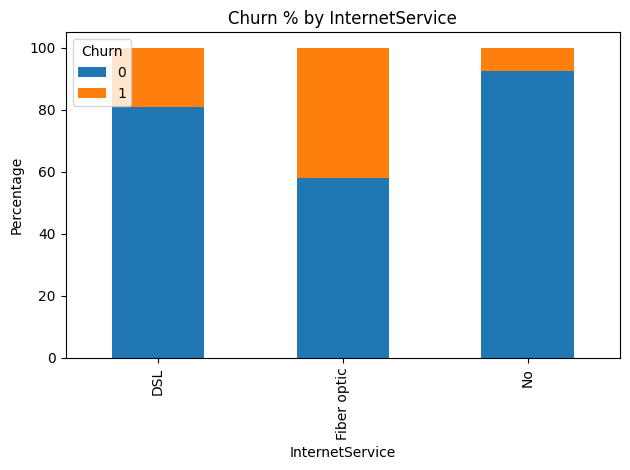


--- OnlineSecurity ---
Churn                        0          1
OnlineSecurity                           
No                   58.221333  41.778667
No internet service  92.565789   7.434211
Yes                  85.359801  14.640199


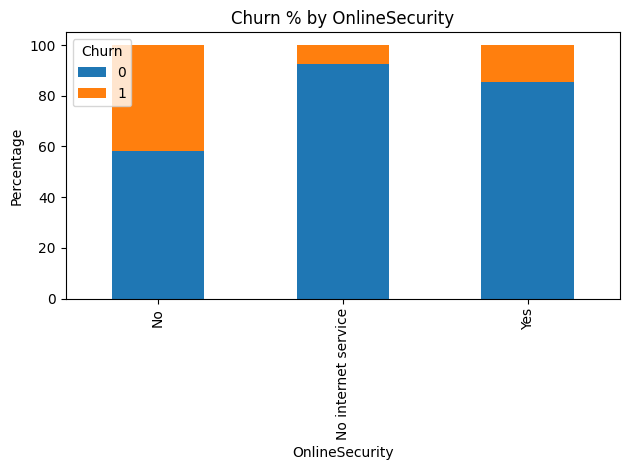


--- OnlineBackup ---
Churn                        0          1
OnlineBackup                             
No                   60.058309  39.941691
No internet service  92.565789   7.434211
Yes                  78.432990  21.567010


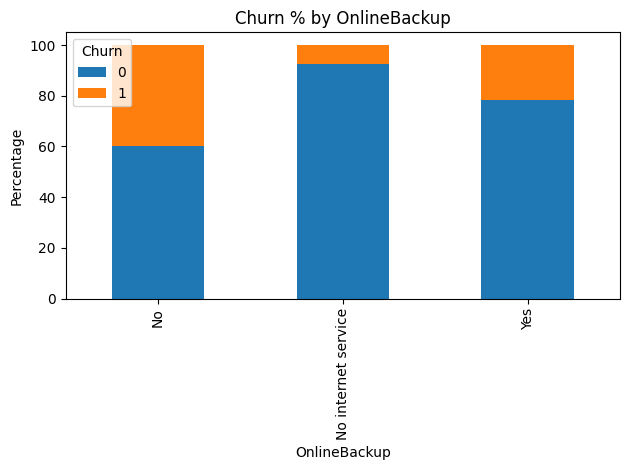


--- DeviceProtection ---
Churn                        0          1
DeviceProtection                         
No                   60.859729  39.140271
No internet service  92.565789   7.434211
Yes                  77.460711  22.539289


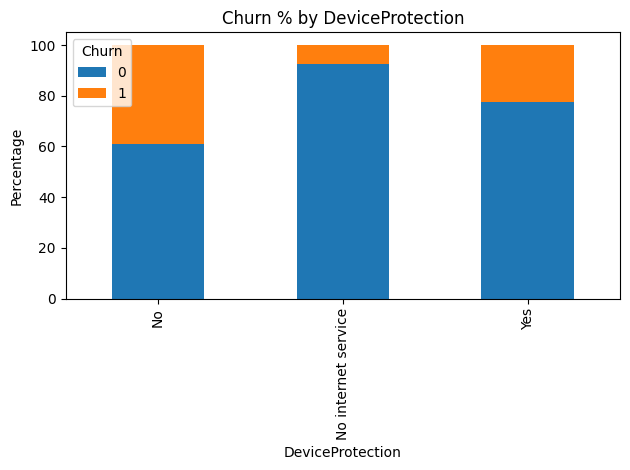


--- TechSupport ---
Churn                        0          1
TechSupport                              
No                   58.352535  41.647465
No internet service  92.565789   7.434211
Yes                  84.803922  15.196078


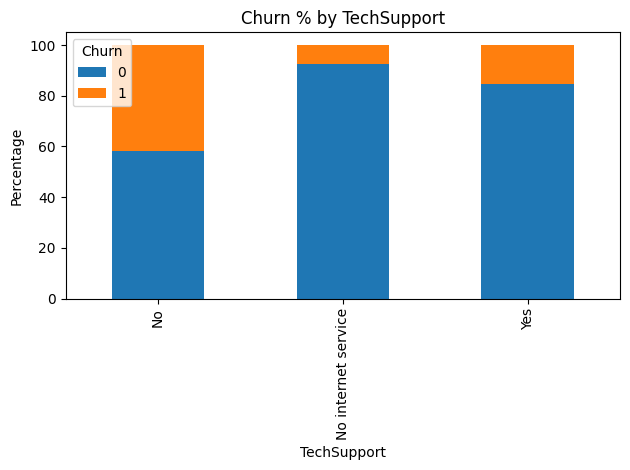


--- StreamingTV ---
Churn                        0          1
StreamingTV                              
No                   66.464934  33.535066
No internet service  92.565789   7.434211
Yes                  69.885313  30.114687


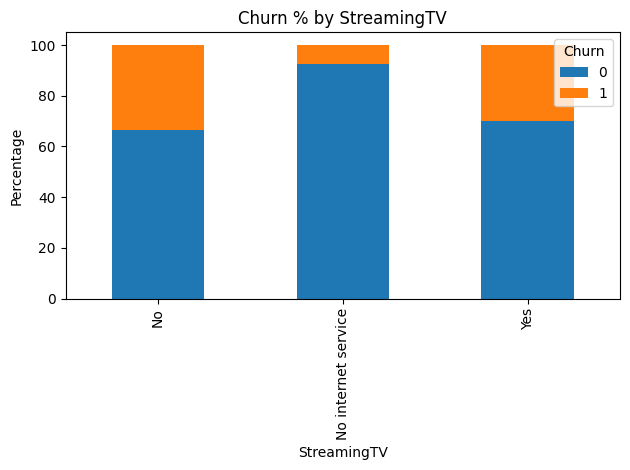


--- StreamingMovies ---
Churn                        0          1
StreamingMovies                          
No                   66.271125  33.728875
No internet service  92.565789   7.434211
Yes                  70.047602  29.952398


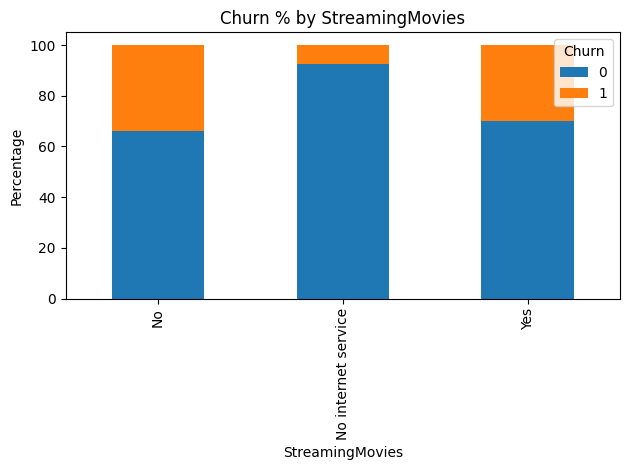


--- Contract ---
Churn                   0          1
Contract                            
Month-to-month  57.290323  42.709677
One year        88.722826  11.277174
Two year        97.151335   2.848665


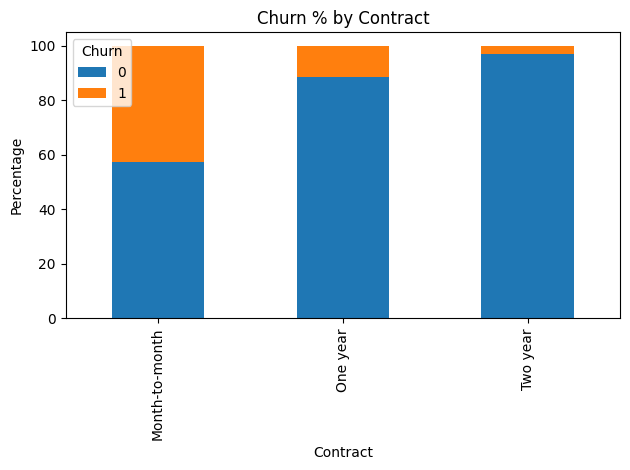


--- PaperlessBilling ---
Churn                     0          1
PaperlessBilling                      
No                83.624302  16.375698
Yes               66.410749  33.589251


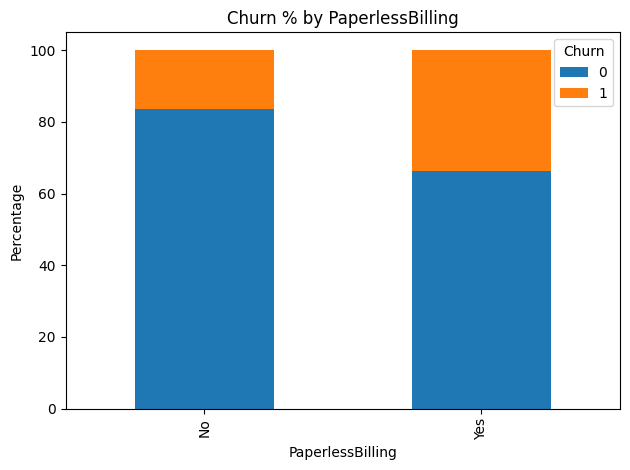


--- PaymentMethod ---
Churn                              0          1
PaymentMethod                                  
Bank transfer (automatic)  83.268482  16.731518
Credit card (automatic)    84.746877  15.253123
Electronic check           54.714588  45.285412
Mailed check               80.798005  19.201995


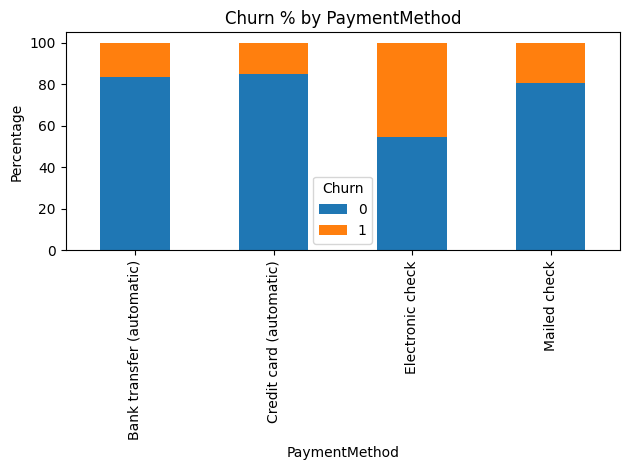

In [14]:
cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Churn']

for col in cat_cols:
    print(f"\n--- {col} ---")
    ctab = pd.crosstab(df[col].fillna('Missing'), df['Churn'], normalize='index') * 100
    print(ctab)
    ctab.plot(kind='bar', stacked=True, title=f"Churn % by {col}")
    plt.ylabel("Percentage")
    plt.tight_layout()
    plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

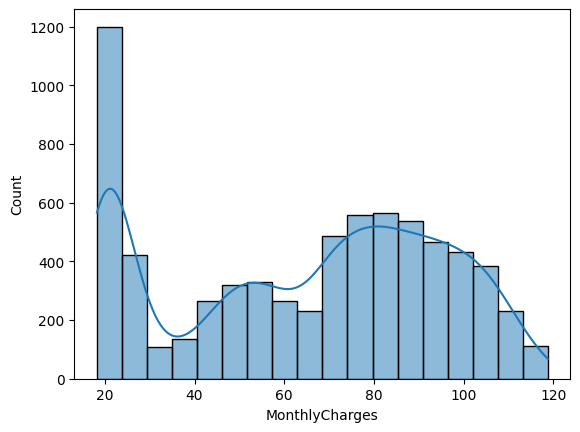

In [70]:
sns.histplot(df['MonthlyCharges'], kde=True)

In [71]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Distribution of Tenure')

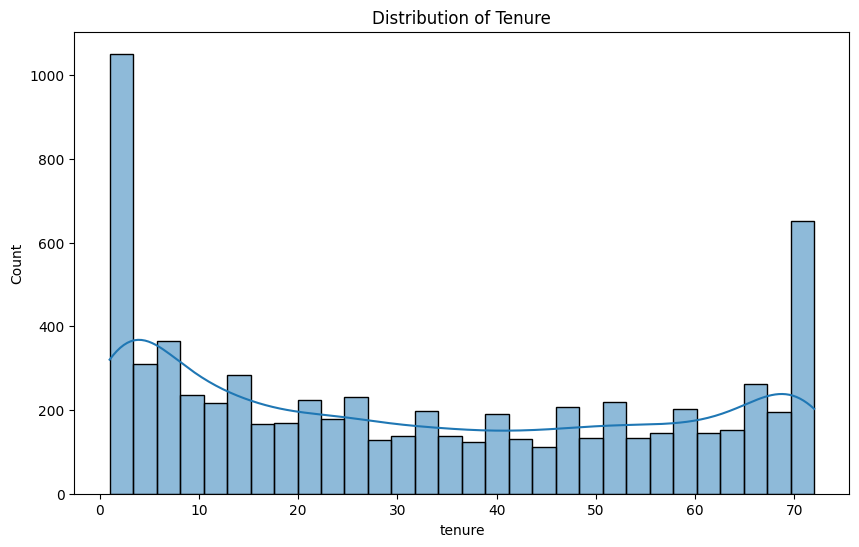

In [16]:
exploration_fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True, ax=ax)
ax.set_title('Distribution of Tenure')

Text(0.5, 1.0, 'Boxplot of Numerical Features')

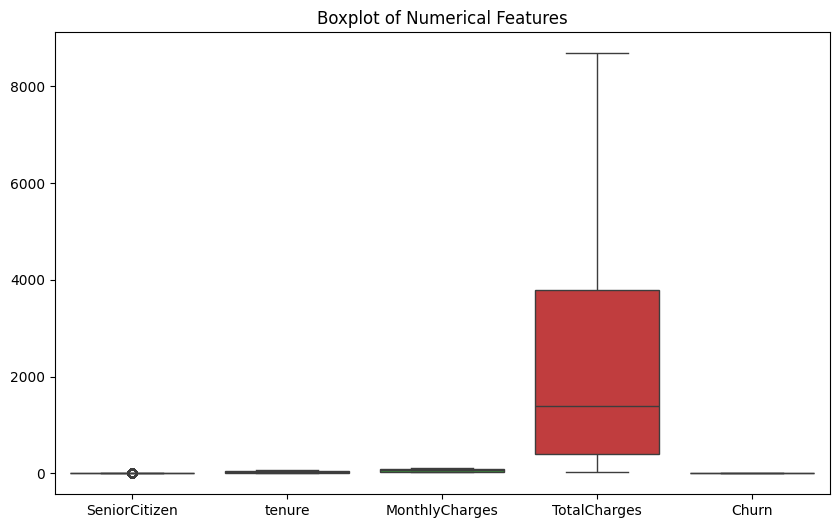

In [15]:
# ---------------------- Day 4: Handling Outliers (IQR) ----------------------
iqr_fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df[num_cols], ax=ax)
ax.set_title('Boxplot of Numerical Features')

Text(0.5, 1.0, 'Z-Score Based Outlier Detection')

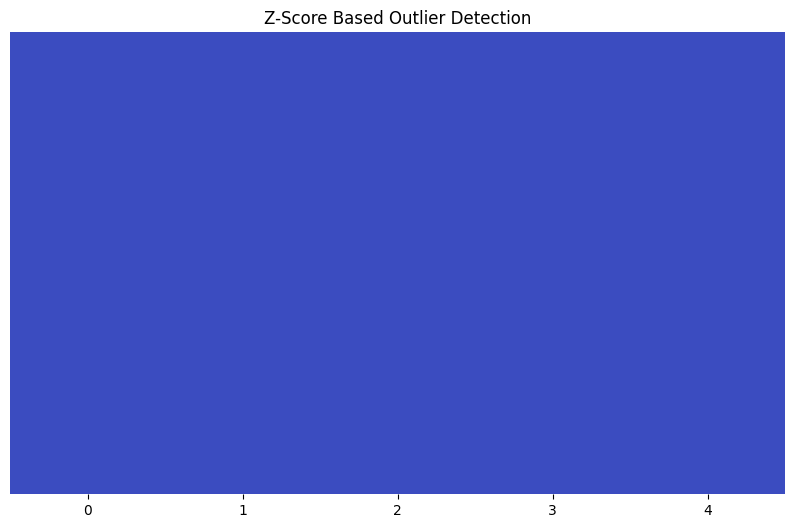

In [17]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df[num_cols]))
outliers = (z_scores > 3)
zscore_fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(outliers, cbar=False, yticklabels=False, cmap='coolwarm', ax=ax)
ax.set_title('Z-Score Based Outlier Detection')